# Advanced Retail Sales Forecasting and Analysis

In [57]:
# Importing required packages and data for data analysis 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline  

In [58]:
# reading data from csv using the pandas 
features=pd.read_csv(r"C:\Users\surya\Downloads\group_7\features.csv")
store = pd.read_csv(r"C:\Users\surya\Downloads\group_7\phase_1\stores.csv")
train=pd.read_csv(r"C:\Users\surya\Downloads\group_7\phase_1\train.csv")
test= pd.read_csv(r"C:\Users\surya\Downloads\group_7\phase_1\test.csv")

# EDA AND DATA CLEANING 

In [59]:
# first 5 rows of dataset(features)
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [60]:
# first 5 rows of dataset(store)
store.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [61]:
# Shape of the dataframe(features)
features.shape

(8190, 12)

In [62]:
# Shape of the dataframe(store)
store.shape

(45, 3)

In [63]:
# first 5 rows of dataset(train)
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [64]:
# The shape of dataframe(train)
train.shape

(421570, 5)

This info method helps us to get total entries, column names and their dtypes, and Non null entries in the columns

In [65]:
# Dataset info (features)
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [66]:
# Dataset info (store)
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [67]:
# Dataset info (train)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [68]:
# Describe method gives all the stats about the data frame

In [69]:
features.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


In [70]:
store.describe()

,Store,Size
count,45.000000,45.000000
mean,23.000000,130287.600000
std,13.133926,63825.271991
min,1.000000,34875.000000
25%,12.000000,70713.000000
50%,23.000000,126512.000000
75%,34.000000,202307.000000
max,45.000000,219622.000000


In [71]:
train.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


In [72]:
# Now we are going to check null entries in the dataframes

In [73]:
features.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [74]:
store.isnull().sum()

Store    0
Type     0
Size     0
dtype: int64

In [75]:
train.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [76]:
# We found that features dataframe contains the null values so we can use fillna method to fill with zeros 

In [77]:
features = features.fillna(0)

In [78]:
features.isnull().sum() #cleared null values

Store           0
Date            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday       0
dtype: int64

In [79]:
# Here we are merging our dataset stores and features
new_df = features.merge(store, how = 'inner', on = 'Store')
new_df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size
0,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,A,151315
1,1,2010-02-12,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,True,A,151315
2,1,2010-02-19,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,False,A,151315
3,1,2010-02-26,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,False,A,151315
4,1,2010-03-05,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,False,A,151315


In [80]:
# Let's inspect new dataframe
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8190 entries, 0 to 8189
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     8190 non-null   float64
 5   MarkDown2     8190 non-null   float64
 6   MarkDown3     8190 non-null   float64
 7   MarkDown4     8190 non-null   float64
 8   MarkDown5     8190 non-null   float64
 9   CPI           8190 non-null   float64
 10  Unemployment  8190 non-null   float64
 11  IsHoliday     8190 non-null   bool   
 12  Type          8190 non-null   object 
 13  Size          8190 non-null   int64  
dtypes: bool(1), float64(9), int64(2), object(2)
memory usage: 903.8+ KB


In [81]:
new_df.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000
mean,23.000000,59.356198,3.405992,3462.090725,1206.981664,776.464219,1392.763115,2043.403725,160.142180,7.267762,130287.600000
std,12.987966,18.678607,0.431337,7388.916286,5495.556015,7539.953758,4707.111488,9431.223215,58.645545,2.708496,63115.971429
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.000000,-185.170000,0.000000,0.000000,34875.000000
25%,12.000000,45.902500,3.041000,0.000000,0.000000,0.000000,0.000000,0.000000,131.051167,6.339000,70713.000000
50%,23.000000,60.710000,3.513000,0.000000,0.000000,0.000000,0.000000,0.000000,140.587450,7.574000,126512.000000
75%,34.000000,73.880000,3.743000,4639.585000,98.590000,24.220000,774.692500,2680.295000,212.766994,8.519000,202307.000000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000,219622.000000


In [82]:
# Here we can see that our Date column is object, since it's a object we can't use it to it's fullest so lets decompose it. 

In [83]:
# Here we are importing the datatime package
from datetime import datetime

In [84]:
new_df['Date']=pd.to_datetime(new_df['Date'])

In [85]:
# Since the same column is present in the train data we need to convert it to the datetime
train['Date']=pd.to_datetime(train['Date'])

In [86]:
# Here we are creating two new columns such as week and year for easier analysis  
new_df['week']=new_df.Date.dt.isocalendar().week

new_df['year']=new_df.Date.dt.isocalendar().year

In [87]:
new_df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size,week,year
0,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,A,151315,5,2010
1,1,2010-02-12,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,True,A,151315,6,2010
2,1,2010-02-19,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,False,A,151315,7,2010
3,1,2010-02-26,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,False,A,151315,8,2010
4,1,2010-03-05,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,False,A,151315,9,2010


In [88]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8190 entries, 0 to 8189
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         8190 non-null   int64         
 1   Date          8190 non-null   datetime64[ns]
 2   Temperature   8190 non-null   float64       
 3   Fuel_Price    8190 non-null   float64       
 4   MarkDown1     8190 non-null   float64       
 5   MarkDown2     8190 non-null   float64       
 6   MarkDown3     8190 non-null   float64       
 7   MarkDown4     8190 non-null   float64       
 8   MarkDown5     8190 non-null   float64       
 9   CPI           8190 non-null   float64       
 10  Unemployment  8190 non-null   float64       
 11  IsHoliday     8190 non-null   bool          
 12  Type          8190 non-null   object        
 13  Size          8190 non-null   int64         
 14  week          8190 non-null   UInt32        
 15  year          8190 non-null   UInt32  

In [89]:
# Here we are joining our dataset train and new_df from the earlier for the whole dataset. Since having the whole can help us to identify the problem and also aids us in getting the correct insights.

data = train.merge(new_df,how='inner', on=['Store','Date','IsHoliday']).sort_values(by=['Store','Dept','Date']).reset_index(drop=True)

In [90]:
# Retrieving the top five rows
data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,week,year
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,5,2010
1,1,1,2010-02-12,46039.49,True,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,A,151315,6,2010
2,1,1,2010-02-19,41595.55,False,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,A,151315,7,2010
3,1,1,2010-02-26,19403.54,False,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,A,151315,8,2010
4,1,1,2010-03-05,21827.90,False,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,A,151315,9,2010


In [91]:
# for better understanding
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
 5   Temperature   421570 non-null  float64       
 6   Fuel_Price    421570 non-null  float64       
 7   MarkDown1     421570 non-null  float64       
 8   MarkDown2     421570 non-null  float64       
 9   MarkDown3     421570 non-null  float64       
 10  MarkDown4     421570 non-null  float64       
 11  MarkDown5     421570 non-null  float64       
 12  CPI           421570 non-null  float64       
 13  Unemployment  421570 non-null  float64       
 14  Type          421570 non-null  object        
 15  Size          421

Since we have seen that Markdown1, markdown2, markdown3, markdown4 and markdown5 columns contains more number of zeros. 
We can consider it for dropping from the table. Let's wait until the end of analysis, if we can use it or not.

In [92]:
# we are going to see if there are duplicate values 
data.duplicated().sum()

0

In [93]:
# For our convinience we are going to rename the IsHoliday as Holiday
data=data.rename(columns={"IsHoliday":'Holiday'})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   Holiday       421570 non-null  bool          
 5   Temperature   421570 non-null  float64       
 6   Fuel_Price    421570 non-null  float64       
 7   MarkDown1     421570 non-null  float64       
 8   MarkDown2     421570 non-null  float64       
 9   MarkDown3     421570 non-null  float64       
 10  MarkDown4     421570 non-null  float64       
 11  MarkDown5     421570 non-null  float64       
 12  CPI           421570 non-null  float64       
 13  Unemployment  421570 non-null  float64       
 14  Type          421570 non-null  object        
 15  Size          421

In [94]:
data.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'Holiday', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size', 'week', 'year'],
      dtype='object')

In [95]:
# as we disscussed, we have to see if we can drop markdown columns or not, for that we use correlation
data.corr()

C:\Users\YOGESH\AppData\Local\Temp\ipykernel_19780\3521716294.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Store,Dept,Weekly_Sales,Holiday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,week,year
Store,1.000000,0.024004,-0.085195,-0.000548,-0.050097,0.065290,-0.059844,-0.033829,-0.020331,-0.042724,-0.012452,-0.211088,0.208552,-0.182881,0.001031,0.002997
Dept,0.024004,1.000000,0.148032,0.000916,0.004437,0.003572,0.001494,0.000587,0.001475,0.001937,0.002668,-0.007477,0.007837,-0.002966,0.000882,0.003738
Weekly_Sales,-0.085195,0.148032,1.000000,0.012774,-0.002312,-0.000120,0.047172,0.020716,0.038562,0.037467,0.050465,-0.020921,-0.025864,0.243828,0.027673,-0.010111
Holiday,-0.000548,0.000916,0.012774,1.000000,-0.155949,-0.078281,-0.003521,0.207604,0.266471,0.011565,-0.015235,-0.001944,0.010460,0.000593,0.128184,-0.056746
Temperature,-0.050097,0.004437,-0.002312,-0.155949,1.000000,0.143859,-0.026415,-0.179672,-0.056026,-0.050281,-0.014752,0.182112,0.096730,-0.058313,0.236276,0.065814
Fuel_Price,0.065290,0.003572,-0.000120,-0.078281,0.143859,1.000000,0.297056,0.029153,0.018615,0.166622,0.215420,-0.164210,-0.033853,0.003361,-0.031140,0.779633
MarkDown1,-0.059844,0.001494,0.047172,-0.003521,-0.026415,0.297056,1.000000,0.174868,-0.014411,0.838904,0.415050,0.010915,-0.105168,0.169788,-0.093572,0.501044
MarkDown2,-0.033829,0.000587,0.020716,0.207604,-0.179672,0.029153,0.174868,1.000000,-0.006080,0.113250,0.131735,-0.003554,-0.041427,0.078372,-0.012812,0.131867
MarkDown3,-0.020331,0.001475,0.038562,0.266471,-0.056026,0.018615,-0.014411,-0.006080,1.000000,-0.012020,0.042471,-0.005839,-0.018078,0.033641,0.122323,0.006789
MarkDown4,-0.042724,0.001937,0.037467,0.011565,-0.050281,0.166622,0.838904,0.113250,-0.012020,1.000000,0.303370,-0.002047,-0.076513,0.127334,-0.114168,0.335340


since the markdown values are mostly negitive and zero it is evident that they do not contribute to weekly sales or any other attributes.so we drop them. 


In [96]:
data=data.drop('MarkDown1', axis=1)
data=data.drop('MarkDown2', axis=1)
data=data.drop('MarkDown3', axis=1)
data=data.drop('MarkDown4', axis=1)
data=data.drop('MarkDown5', axis=1)
data.info

<bound method DataFrame.info of         Store  Dept       Date  Weekly_Sales  Holiday  Temperature  \
0           1     1 2010-02-05      24924.50    False        42.31   
1           1     1 2010-02-12      46039.49     True        38.51   
2           1     1 2010-02-19      41595.55    False        39.93   
3           1     1 2010-02-26      19403.54    False        46.63   
4           1     1 2010-03-05      21827.90    False        46.50   
...       ...   ...        ...           ...      ...          ...   
421565     45    98 2012-09-28        508.37    False        64.88   
421566     45    98 2012-10-05        628.10    False        64.89   
421567     45    98 2012-10-12       1061.02    False        54.47   
421568     45    98 2012-10-19        760.01    False        56.47   
421569     45    98 2012-10-26       1076.80    False        58.85   

        Fuel_Price         CPI  Unemployment Type    Size  week  year  
0            2.572  211.096358         8.106    A  1513

In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   Holiday       421570 non-null  bool          
 5   Temperature   421570 non-null  float64       
 6   Fuel_Price    421570 non-null  float64       
 7   CPI           421570 non-null  float64       
 8   Unemployment  421570 non-null  float64       
 9   Type          421570 non-null  object        
 10  Size          421570 non-null  int64         
 11  week          421570 non-null  UInt32        
 12  year          421570 non-null  UInt32        
dtypes: UInt32(2), bool(1), datetime64[ns](1), float64(5), int64(3), object(1)
memory usage: 36.6+ MB


## Visualizations

In [98]:
# Let's find out how many unique deptartments and stores present in our dataframe
data.Store.unique()

# We found that we have 45 unique stores in the dataframe

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45], dtype=int64)

<Axes: >

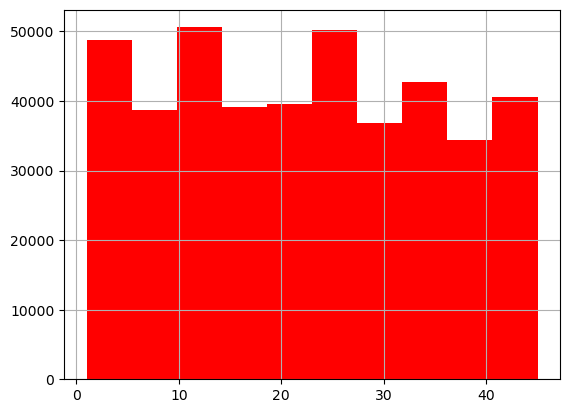

In [99]:
# This plot shows the distribution of different stores spread across our data
data.Store.hist(color='red')

array([[<Axes: title={'center': 'Store'}>,
        <Axes: title={'center': 'Dept'}>,
        <Axes: title={'center': 'Date'}>],
       [<Axes: title={'center': 'Weekly_Sales'}>,
        <Axes: title={'center': 'Temperature'}>,
        <Axes: title={'center': 'Fuel_Price'}>],
       [<Axes: title={'center': 'CPI'}>,
        <Axes: title={'center': 'Unemployment'}>,
        <Axes: title={'center': 'Size'}>],
       [<Axes: title={'center': 'week'}>,
        <Axes: title={'center': 'year'}>, <Axes: >]], dtype=object)

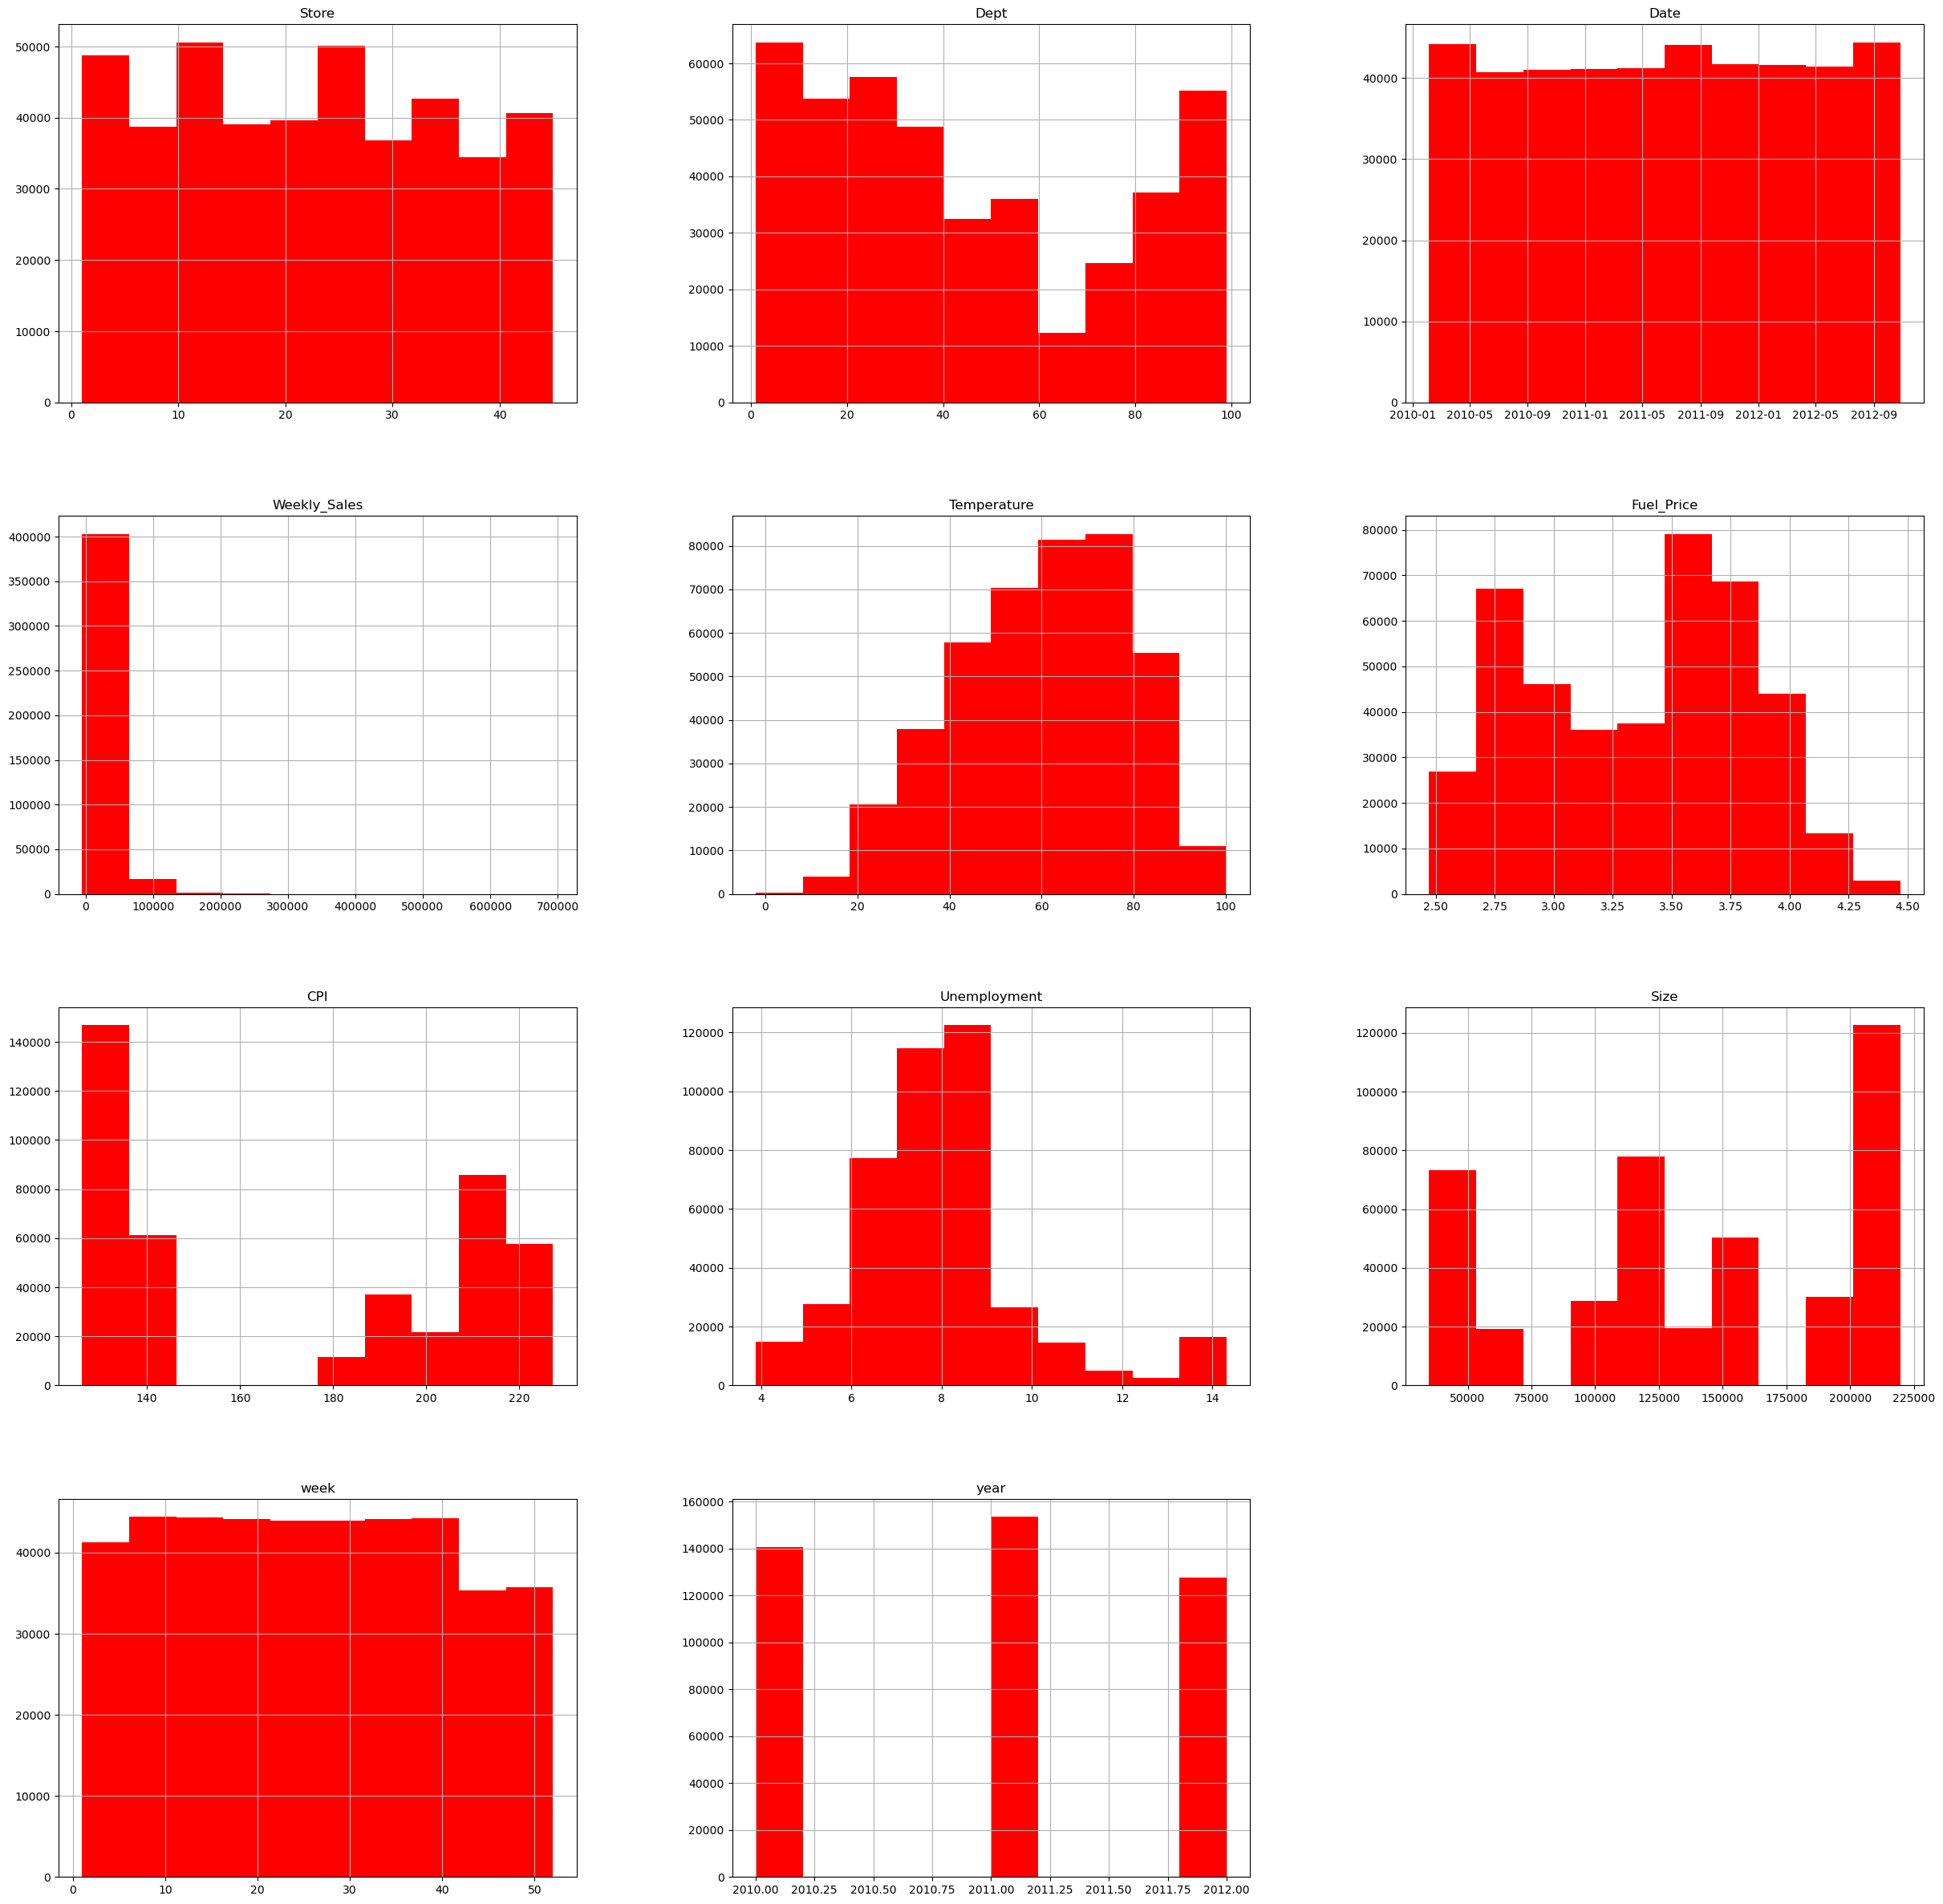

In [100]:
data.hist(figsize=(30,30), color = 'red')

In [101]:
# Let's find out the unique departments in the dataframe.
data.Dept.unique()
# We found that there are 65 different departments in the dataset

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 40, 41, 42, 44, 45, 46, 47, 48, 49, 51, 52, 54, 55, 56,
       58, 59, 60, 67, 71, 72, 74, 77, 78, 79, 80, 81, 82, 83, 85, 87, 90,
       91, 92, 93, 94, 95, 96, 97, 98, 99, 39, 50, 43, 65], dtype=int64)

In [102]:
# Let's find that how many years weekly sales does our data contain.

<Axes: >

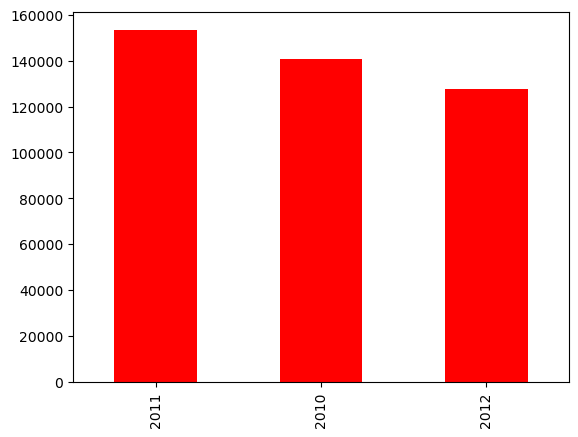

In [103]:
data['year'].value_counts().plot.bar(color='red')

In [104]:
# In the above graph we get to know that our data contains three years weekly sales 


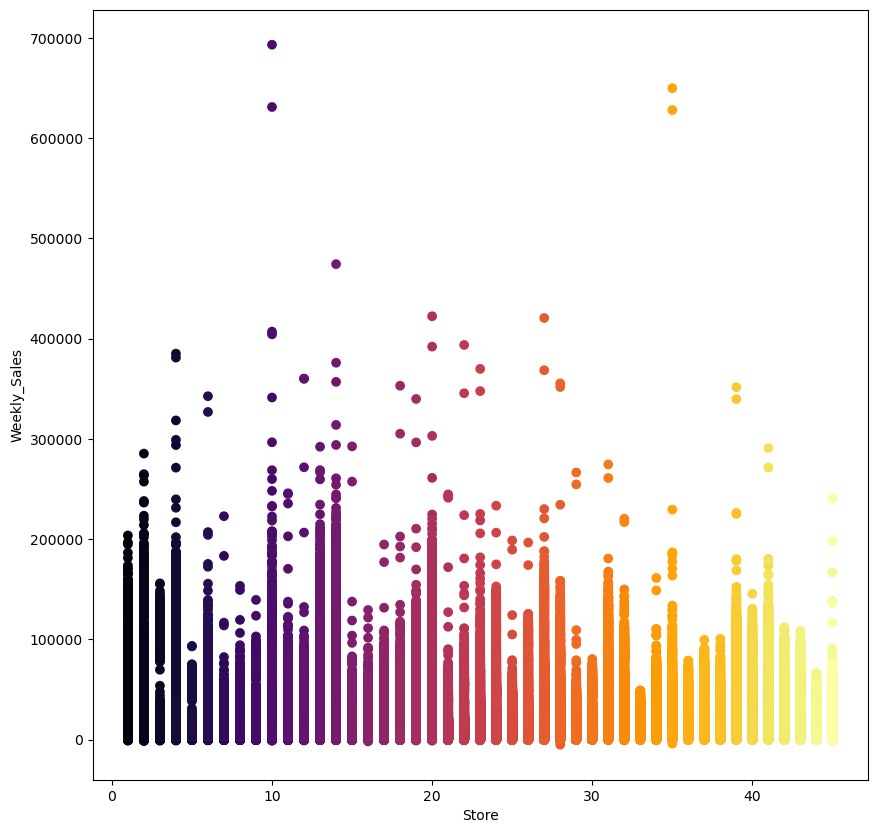

In [105]:
# The scatter plot points the weekly sales of different stores  
plt.figure(figsize=(10,10))
plt.scatter(data['Store'],data['Weekly_Sales'], c=data.index, cmap='inferno')
plt.ylabel('Weekly_Sales')
plt.xlabel('Store')

plt.show()

Text(0.5, 0, 'Dept')

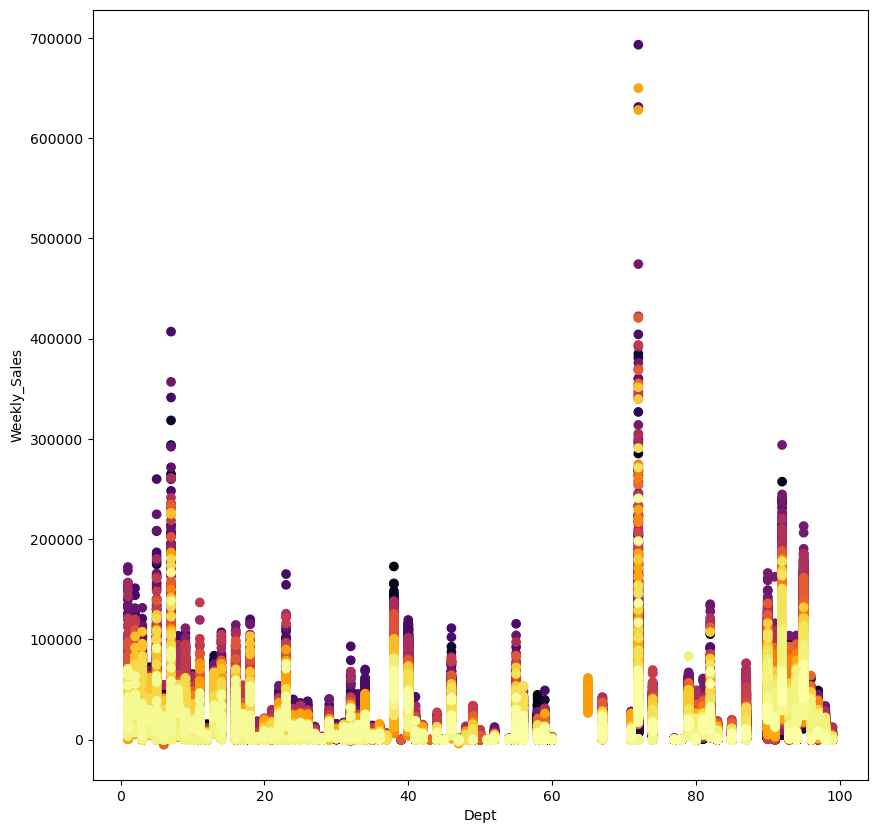

In [106]:
# The scatter plot points the weekly sales of different dept  
plt.figure(figsize=(10,10))
plt.scatter(data['Dept'],data['Weekly_Sales'], c=data.index, cmap='inferno')
plt.ylabel('Weekly_Sales')
plt.xlabel('Dept')


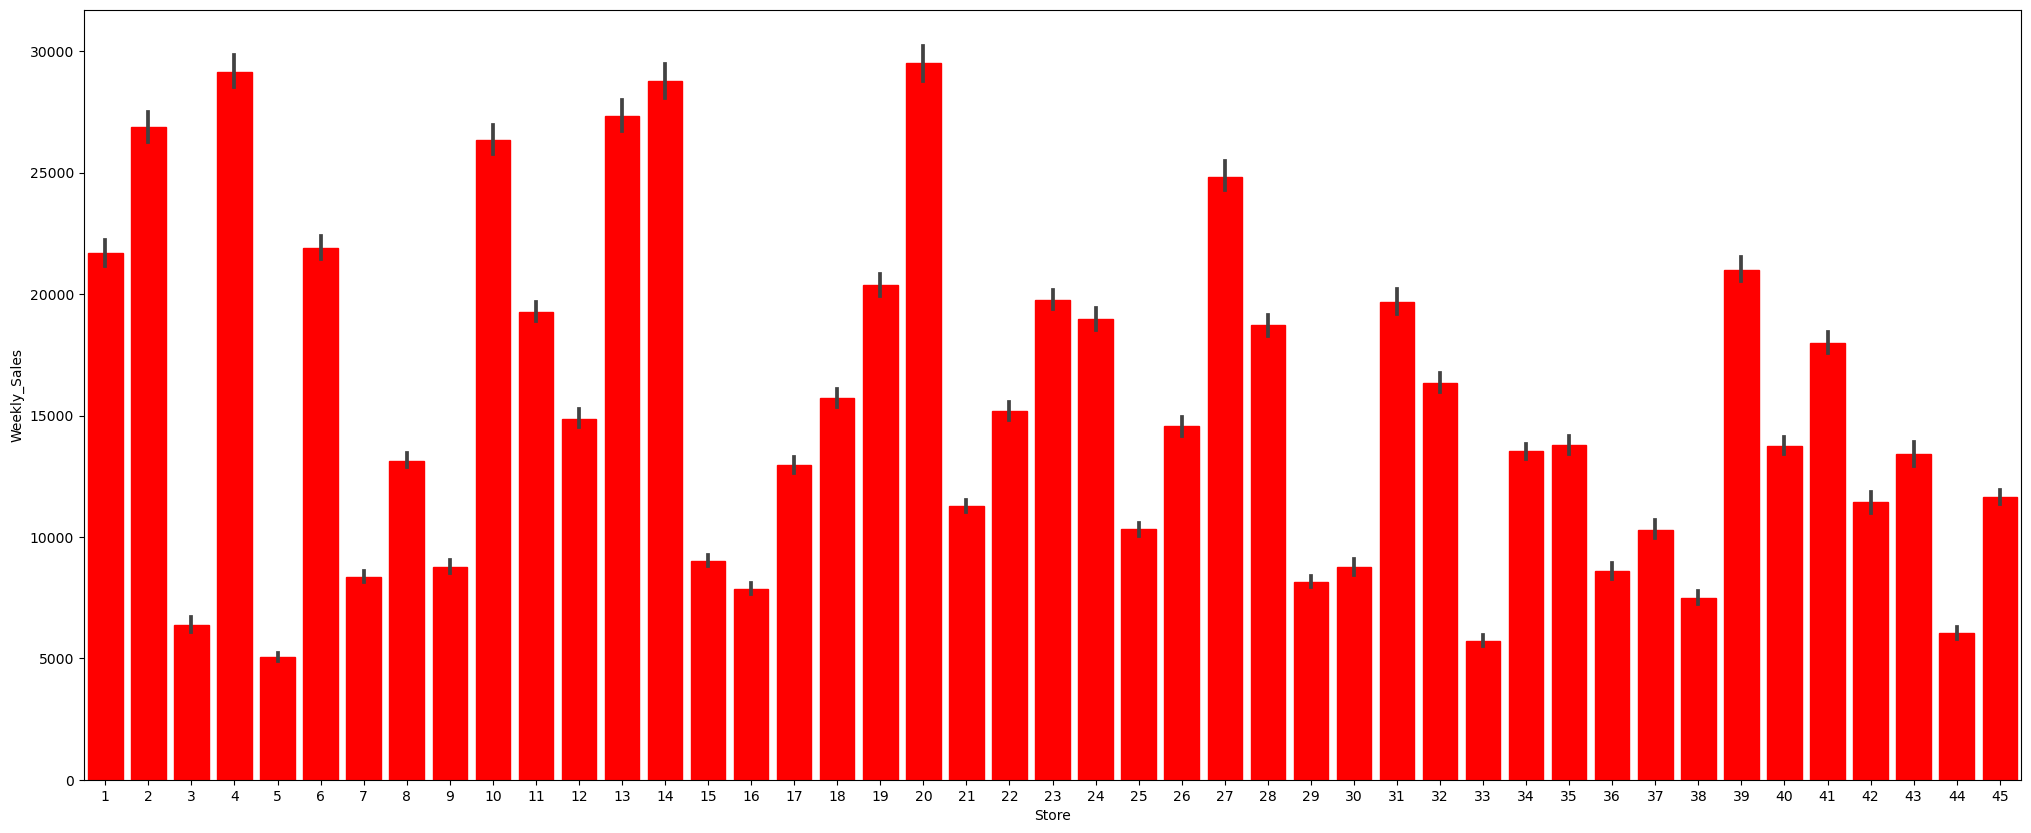

In [107]:
# Set the figure size
plt.figure(figsize=(25, 10))

# Define a color palette
palette = sns.color_palette("husl", len(data['Store']))

# Create the bar plot with the defined color palette
ax = sns.barplot(x='Store', y='Weekly_Sales', data=data, palette=palette)

# Highlight bars based on sales threshold
sales_threshold = 5000  # Adjust this threshold as needed
for bar in ax.patches:
    if bar.get_height() > sales_threshold:
        bar.set_color('red')  # Change the color to red for bars exceeding the threshold

# Show the plot
plt.show()

<Axes: xlabel='Dept', ylabel='Weekly_Sales'>

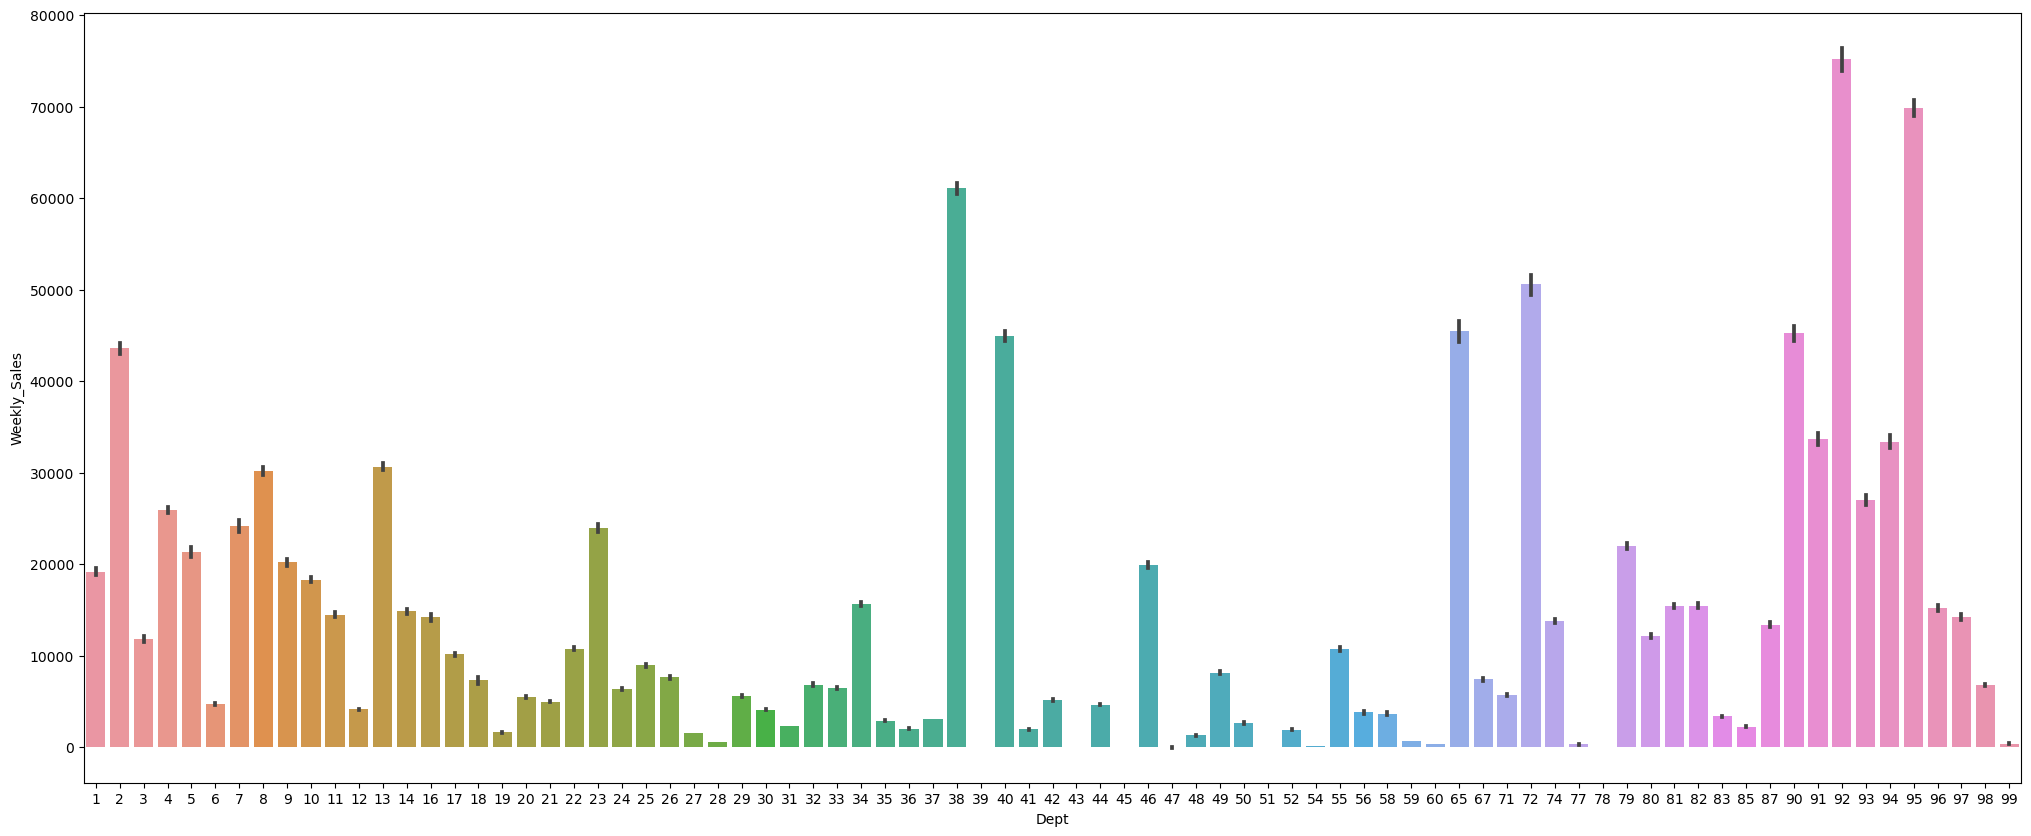

In [108]:
#Here we are getting the weekly sales by department
plt.figure(figsize=(25,10))

sns.barplot(x='Dept', y='Weekly_Sales', data=data, )

C:\Users\YOGESH\AppData\Local\Temp\ipykernel_19780\2477012001.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot =True)


<Axes: >

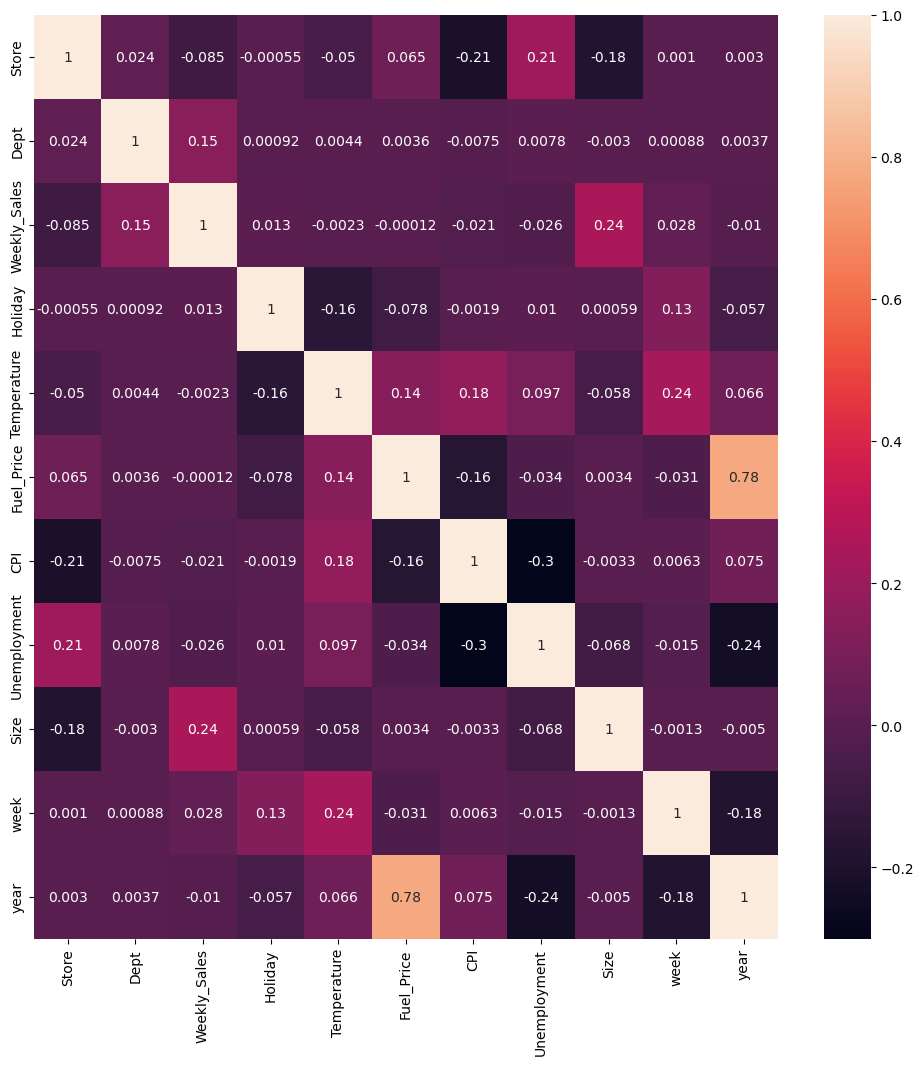

In [109]:
# Lets find the correlation among the features in the dataset
plt.figure(figsize=(12,12))

sns.heatmap(data.corr(),annot =True)



<Axes: >

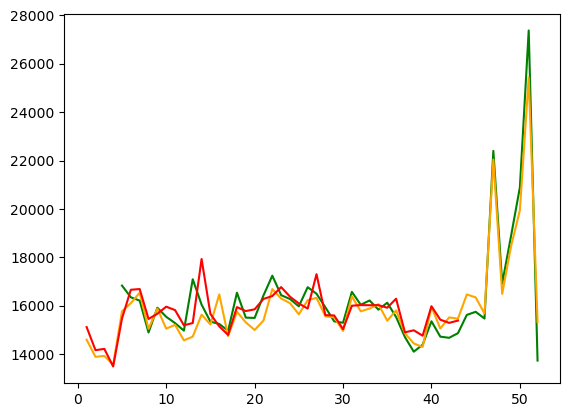

In [110]:
# Here we are getting the sales by yearly
sales_2010 = data[data['year']==2010]['Weekly_Sales'].groupby(data['week']).mean()
sales_2011 = data[data['year']==2011]['Weekly_Sales'].groupby(data['week']).mean()
sales_2012 = data[data['year']==2012]['Weekly_Sales'].groupby(data['week']).mean()
#Plot a line plot with week on x axis and sales for that particular week of the filtered year in y axis
sns.lineplot(x=np.array(sales_2010.index),y=sales_2010.values,color='green')
sns.lineplot(x=np.array(sales_2011.index),y=sales_2011.values,color='orange')
sns.lineplot(x=np.array(sales_2012.index),y=sales_2012.values,color='red')

C:\Users\YOGESH\AppData\Local\Temp\ipykernel_19780\3273081830.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Weekly_Sales'],color='red')


<Axes: xlabel='Weekly_Sales', ylabel='Density'>

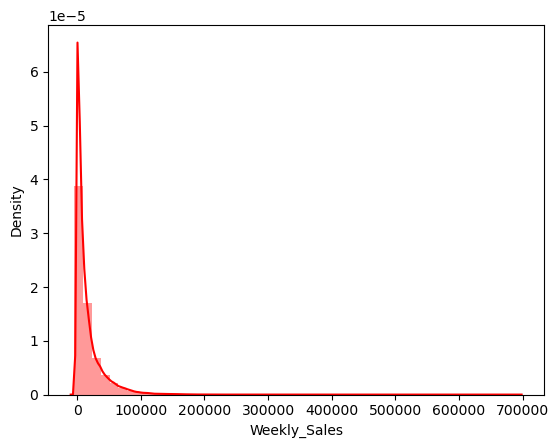

In [111]:
sns.distplot(data['Weekly_Sales'],color='red')

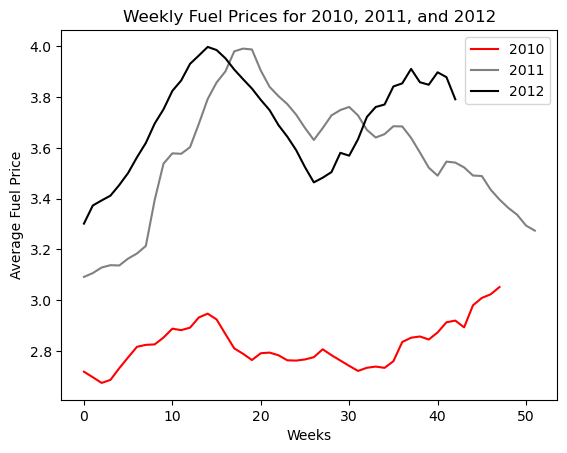

In [112]:


# Grouped data for three years of fuel prices by week
fuel_10 = data[data['year'] == 2010]['Fuel_Price'].groupby(data['week']).mean()
fuel_11 = data[data['year'] == 2011]['Fuel_Price'].groupby(data['week']).mean()
fuel_12 = data[data['year'] == 2012]['Fuel_Price'].groupby(data['week']).mean()

# Create line plots for each year with labels
sns.lineplot(fuel_10.values, color='red', label='2010')
sns.lineplot(fuel_11.values, color='grey', label='2011')
sns.lineplot(fuel_12.values, color='black', label='2012')

plt.legend(loc='upper right')


plt.xlabel('Weeks')
plt.ylabel('Average Fuel Price')
plt.title('Weekly Fuel Prices for 2010, 2011, and 2012')

plt.show()


<Axes: xlabel='Type', ylabel='Size'>

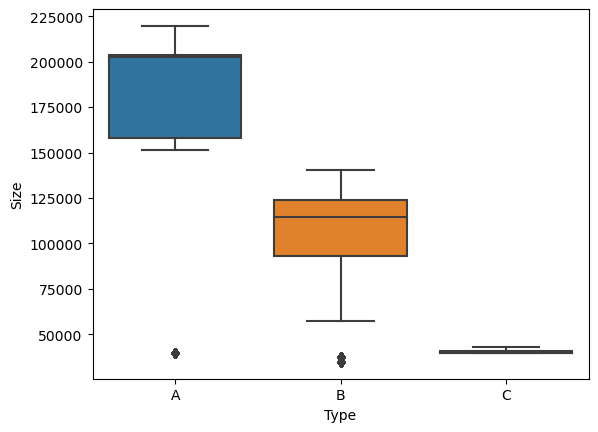

In [113]:
#Box plot between the size and type of stores
sns.boxplot(data = data, x = 'Type', y = 'Size')

In [114]:
# Lets check the temperature, fuel prices and unemployment over the weekly sales.
Fuel_priceXsales = pd.pivot_table(data, values= "Weekly_Sales",index= "Fuel_Price")

<Axes: xlabel='Fuel_Price'>

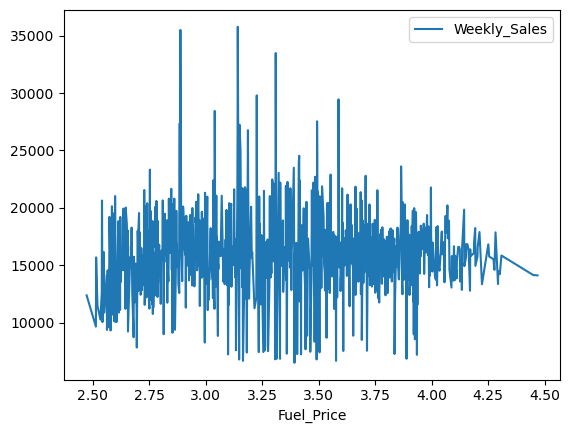

In [115]:
Fuel_priceXsales.plot()

In [116]:
tempXsales = pd.pivot_table(data, values= "Weekly_Sales",index= "Temperature")

<Axes: xlabel='Temperature'>

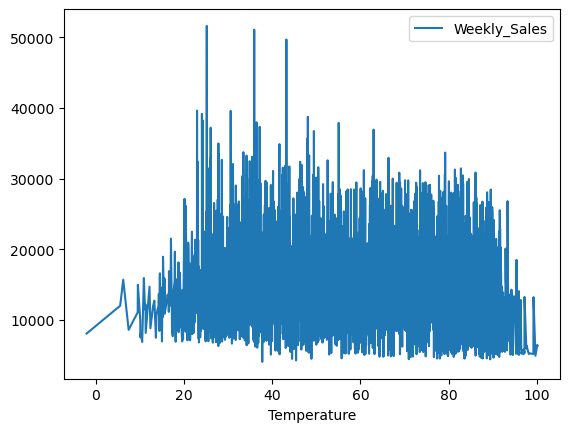

In [117]:
tempXsales.plot()

In [118]:
unemploymentXsales = pd.pivot_table(data, values= "Weekly_Sales",index= "Unemployment")

<Axes: xlabel='Unemployment'>

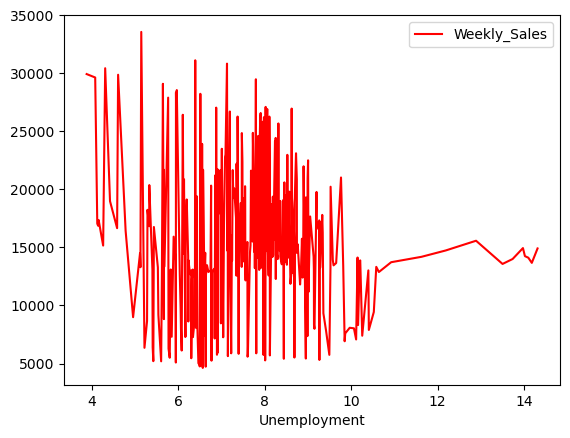

In [119]:
unemploymentXsales.plot(color='red')

In [120]:
train.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday'], dtype='object')

In [121]:
train_X=train.drop(['Weekly_Sales','Date'], axis=1)
#here we are going to divide the data into train and test meaning what columns we want to predict on based on what columns
#  train Y= Only Weekly_Sales 
train_y=train['Weekly_Sales'] 
test_X=test.drop('Date',axis=1).copy()

train_X.shape, train_y.shape, test_X.shape

((421570, 3), (421570,), (115064, 3))

In [122]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_X,train_y, train_size = 0.7)

# RANDOM FOREST (MODEL 1)

In [123]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error as mse

In [124]:
%timeit
param_grid={'n_estimators':np.arange(21,101,5)}
tree=GridSearchCV(RandomForestRegressor(oob_score=False,warm_start=True),param_grid,cv=2,n_jobs=-1, verbose=50)
tree.fit(X_train,y_train)

Fitting 2 folds for each of 16 candidates, totalling 32 fits


GridSearchCV(cv=2, estimator=RandomForestRegressor(warm_start=True), n_jobs=-1,
             param_grid={'n_estimators': array([21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 91, 96])},
             verbose=50)

In [125]:
clf_rf = RandomForestRegressor(n_estimators=37, n_jobs=-1, verbose=5)
clf_rf.fit(X_train,y_train)
y_pred_rf = clf_rf.predict(X_test)
#to measure the effectiveness of the model we are going to us accuracy of the model. 
acc_rf = round(clf_rf.score(train_X,train_y)*100,2)
print('Accuracy of Random Forest model: '+str(acc_rf) +'%')

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 37
building tree 2 of 37
building tree 3 of 37
building tree 4 of 37
building tree 5 of 37
building tree 6 of 37
building tree 7 of 37
building tree 8 of 37
building tree 9 of 37
building tree 10 of 37
building tree 11 of 37
building tree 12 of 37
building tree 13 of 37
building tree 14 of 37
building tree 15 of 37
building tree 16 of 37


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.6s


building tree 17 of 37
building tree 18 of 37
building tree 19 of 37
building tree 20 of 37
building tree 21 of 37
building tree 22 of 37
building tree 23 of 37
building tree 24 of 37
building tree 25 of 37
building tree 26 of 37
building tree 27 of 37
building tree 28 of 37
building tree 29 of 37
building tree 30 of 37
building tree 31 of 37
building tree 32 of 37
building tree 33 of 37
building tree 34 of 37
building tree 35 of 37
building tree 36 of 37
building tree 37 of 37


[Parallel(n_jobs=-1)]: Done  30 out of  37 | elapsed:    1.9s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  37 out of  37 | elapsed:    2.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  30 out of  37 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done  37 out of  37 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s


Accuracy of Random Forest model: 90.89%


[Parallel(n_jobs=8)]: Done  30 out of  37 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=8)]: Done  37 out of  37 | elapsed:    0.1s finished


In [126]:
pred_val_rf = clf_rf.predict(X_test)
pred_val_rf

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  30 out of  37 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done  37 out of  37 | elapsed:    0.0s finished


array([14472.9428165 ,   833.94222125, 10099.32847351, ...,
        1873.37373142,  7624.12087036,  4534.72055115])

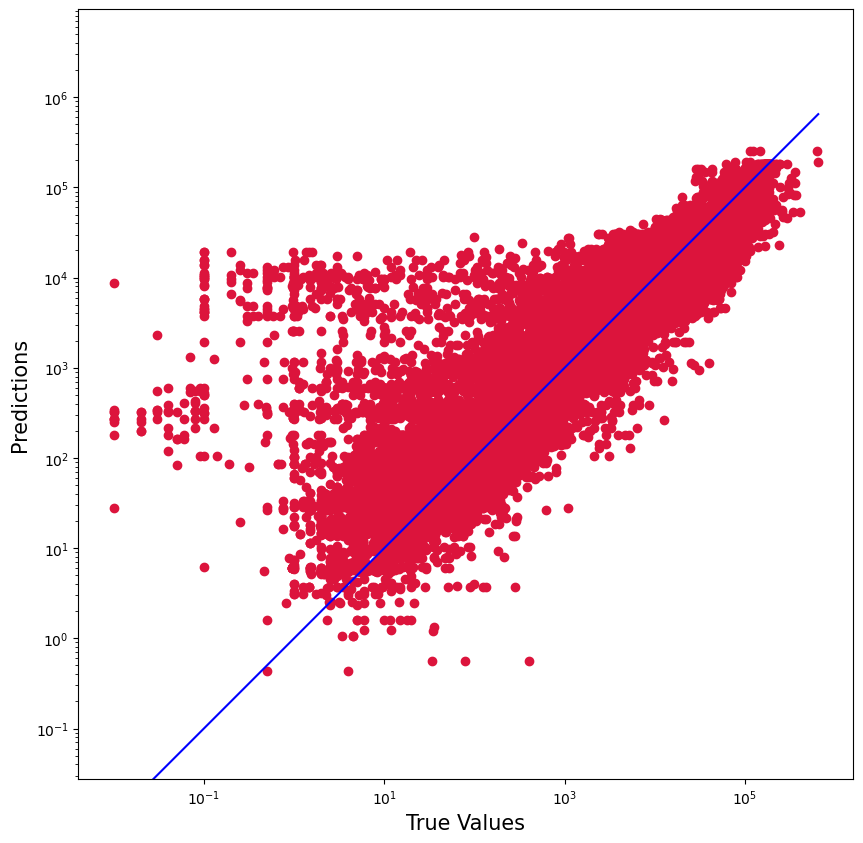

In [127]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, pred_val_rf, c='crimson')
plt.yscale('log')
plt.xscale('log')
p1 = max(max(pred_val_rf), max(y_test))
p2 = min(min(pred_val_rf), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

# DECISION TREE (MODEL 2)

In [128]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor()
reg.fit(X_train,y_train)
y_pred_dt = reg.predict(X_test)
acc_dt = round(reg.score(X_train,y_train)*100,2)
print("Accuracy of Decision Tree Model: "+str(acc_dt)+'%')

Accuracy of Decision Tree Model: 91.18%


In [129]:
pred_val = reg.predict(X_test)
pred_val

array([14470.26229885,   829.49222222, 10092.32119565, ...,
        1875.25      ,  7634.93485981,  4542.03168421])

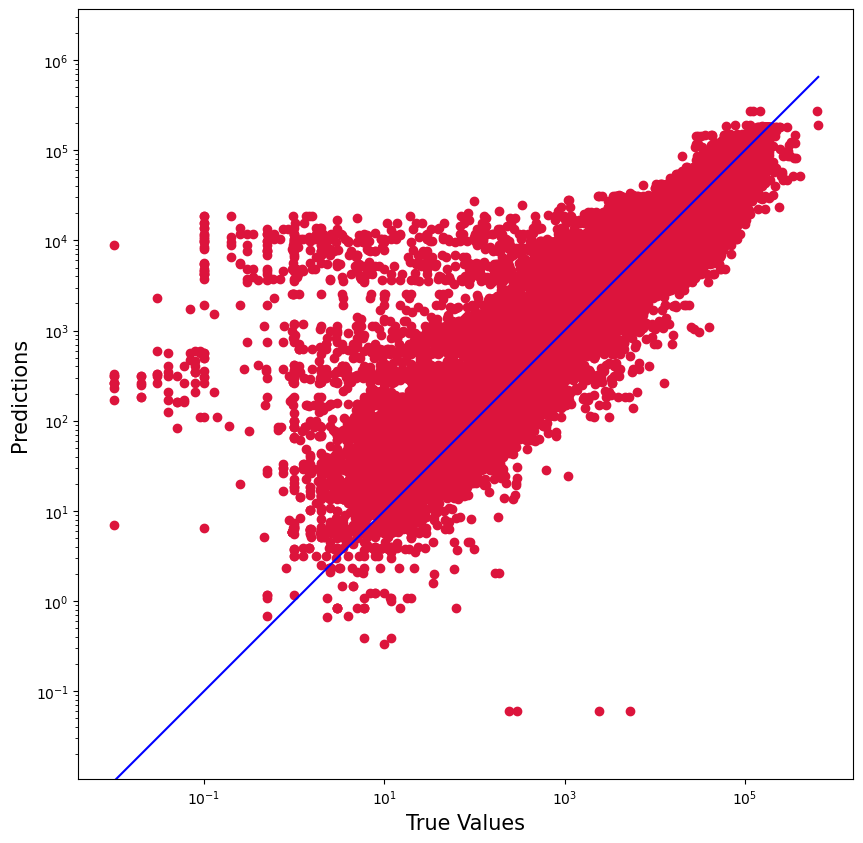

In [130]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, pred_val, c='crimson')
plt.yscale('log')
plt.xscale('log')
p1 = max(max(pred_val), max(y_test))
p2 = min(min(pred_val), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

# LOGISTIC REGRESSION (MODEL 3)

In [131]:
df1= data

In [132]:
df1.head()

,Store,Dept,Date,Weekly_Sales,Holiday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,week,year
0,1,1,2010-02-05,24924.50,False,42.31,2.572,211.096358,8.106,A,151315,5,2010
1,1,1,2010-02-12,46039.49,True,38.51,2.548,211.242170,8.106,A,151315,6,2010
2,1,1,2010-02-19,41595.55,False,39.93,2.514,211.289143,8.106,A,151315,7,2010
3,1,1,2010-02-26,19403.54,False,46.63,2.561,211.319643,8.106,A,151315,8,2010
4,1,1,2010-03-05,21827.90,False,46.50,2.625,211.350143,8.106,A,151315,9,2010


In [133]:
df1['Holiday']= df1['Holiday'].astype(int)  
df1

,Store,Dept,Date,Weekly_Sales,Holiday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,week,year
0,1,1,2010-02-05,24924.50,0,42.31,2.572,211.096358,8.106,A,151315,5,2010
1,1,1,2010-02-12,46039.49,1,38.51,2.548,211.242170,8.106,A,151315,6,2010
2,1,1,2010-02-19,41595.55,0,39.93,2.514,211.289143,8.106,A,151315,7,2010
3,1,1,2010-02-26,19403.54,0,46.63,2.561,211.319643,8.106,A,151315,8,2010
4,1,1,2010-03-05,21827.90,0,46.50,2.625,211.350143,8.106,A,151315,9,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,0,64.88,3.997,192.013558,8.684,B,118221,39,2012
421566,45,98,2012-10-05,628.10,0,64.89,3.985,192.170412,8.667,B,118221,40,2012
421567,45,98,2012-10-12,1061.02,0,54.47,4.000,192.327265,8.667,B,118221,41,2012
421568,45,98,2012-10-19,760.01,0,56.47,3.969,192.330854,8.667,B,118221,42,2012


In [134]:
df1['month']=df1['Date'].dt.month

df1['year']=df1.Date.dt.isocalendar().year

In [135]:
df1= df1.drop('Date', axis =1 )
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Weekly_Sales  421570 non-null  float64
 3   Holiday       421570 non-null  int32  
 4   Temperature   421570 non-null  float64
 5   Fuel_Price    421570 non-null  float64
 6   CPI           421570 non-null  float64
 7   Unemployment  421570 non-null  float64
 8   Type          421570 non-null  object 
 9   Size          421570 non-null  int64  
 10  week          421570 non-null  UInt32 
 11  year          421570 non-null  UInt32 
 12  month         421570 non-null  int64  
dtypes: UInt32(2), float64(5), int32(1), int64(4), object(1)
memory usage: 37.8+ MB


In [136]:
def onehot_encode(df2, column, prefix):
    df2 = df2.copy()
    dummies = pd.get_dummies(df2[column], prefix=prefix)
    df2 = pd.concat([df2, dummies], axis=1)
    df2 = df2.drop(column, axis=1)
    return df2

In [137]:
df1 = onehot_encode(df1, column='Store', prefix='store')
df1= df1.drop('Type', axis = 1 )

In [138]:
y1 = df1['Holiday'].copy()
X1 = df1.drop('Holiday', axis=1).copy()


In [139]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

scaler = StandardScaler()

X1 = scaler.fit_transform(X1)

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, train_size=0.7)

In [141]:
log_model = LogisticRegression()

In [142]:
log_model.fit(X_train, y_train)

LogisticRegression()

In [143]:
print("Logi_model Accuracy:", log_model.score(X_test, y_test))

Logi_model Accuracy: 0.930924876058543


In [144]:
pred=log_model.predict(X_test)
pred

array([0, 0, 0, ..., 0, 0, 0])

<Axes: >

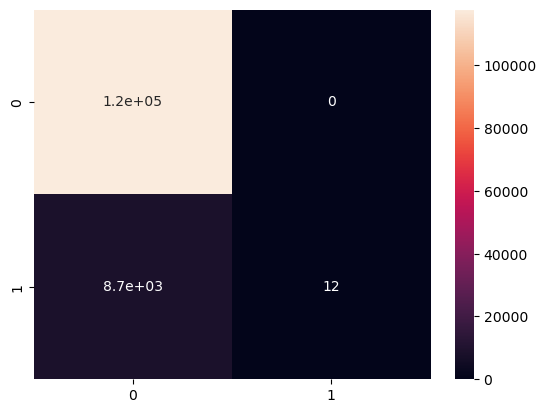

In [145]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test,pred)
sns.heatmap(cm, annot=True)

In [146]:
pip install --upgrade scikit-learn


Note: you may need to restart the kernel to use updated packages.


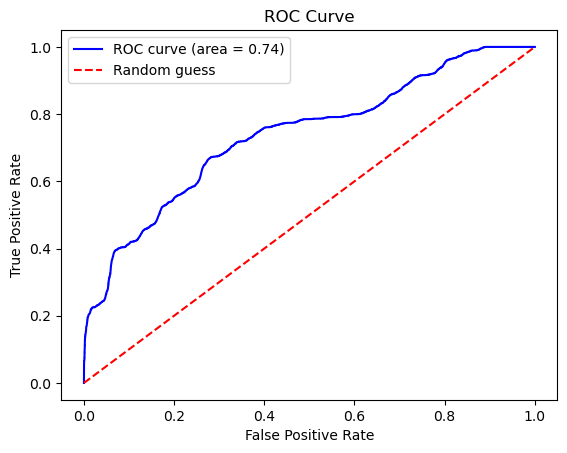

In [147]:
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

# Assuming `log_model` is your logistic regression model, and `X_test`, `y_test` are test datasets
y_pred_proba = log_model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)  # Calculate false positive rate and true positive rate
roc_auc = metrics.auc(fpr, tpr)  # Calculate area under the ROC curve

# Plot ROC curve manually
plt.plot(fpr, tpr, color='b', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='r', linestyle='--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


# Weekly Sales Vs Temperature

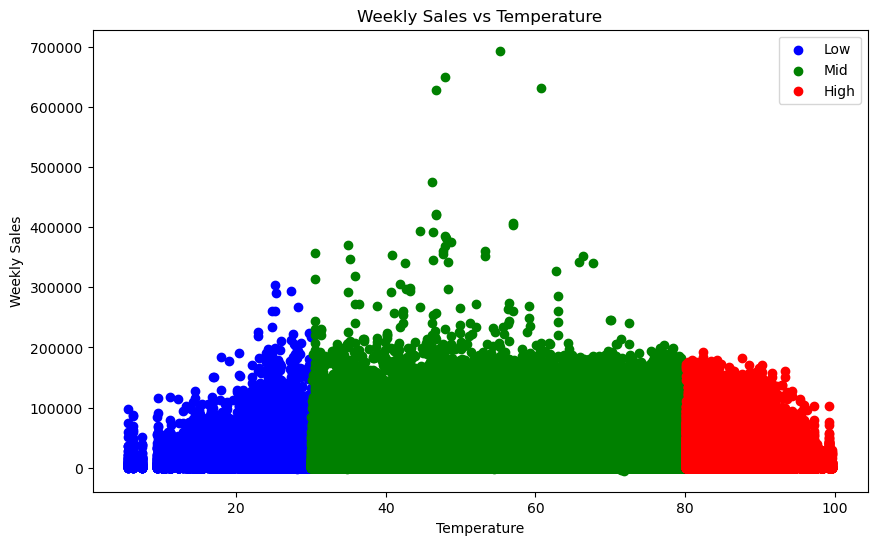

In [148]:
import matplotlib.pyplot as plt

# Define temperature ranges and corresponding colors
temperature_ranges = [(0, 30), (30, 80), (80, 100)]
colors = ['blue', 'green', 'red']
labels = ['Low', 'Mid', 'High']

# Create a scatter plot with different colors for each temperature range
plt.figure(figsize=(10, 6))
for i, (temp_range, color, label) in enumerate(zip(temperature_ranges, colors, labels)):
    mask = (data['Temperature'] >= temp_range[0]) & (data['Temperature'] < temp_range[1])
    plt.scatter(data[mask]['Temperature'], data[mask]['Weekly_Sales'], c=color, label=label)

plt.xlabel('Temperature')
plt.ylabel('Weekly Sales')
plt.title('Weekly Sales vs Temperature')
plt.legend()
plt.show()


# average weekly sales by fuel price range

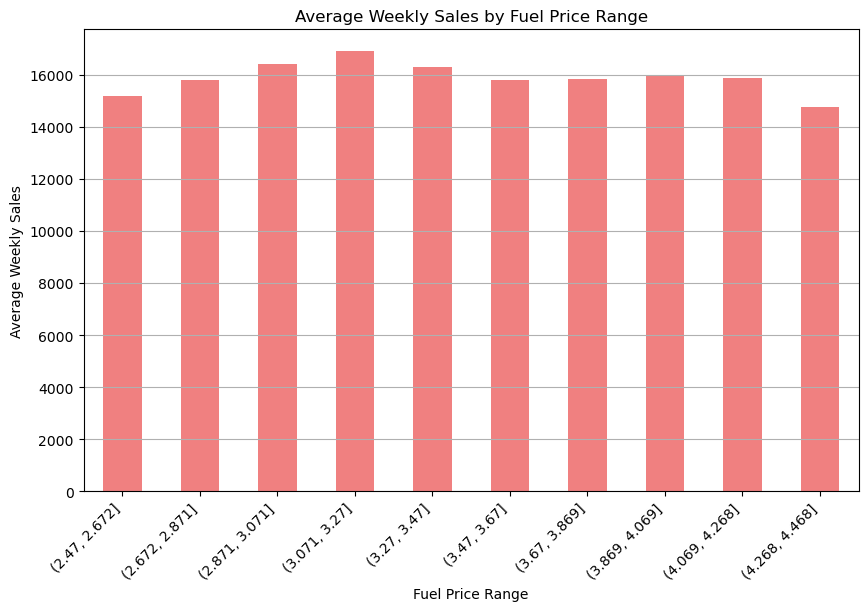

In [149]:
import numpy as np

# Grouping data based on fuel price and calculating average weekly sales
fuel_price_groups = data.groupby(pd.cut(data['Fuel_Price'], bins=10))['Weekly_Sales'].mean()

# Bar plot of Average Weekly Sales by Fuel Price
plt.figure(figsize=(10, 6))
fuel_price_groups.plot(kind='bar', color='lightcoral')
plt.xlabel('Fuel Price Range')
plt.ylabel('Average Weekly Sales')
plt.title('Average Weekly Sales by Fuel Price Range')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()


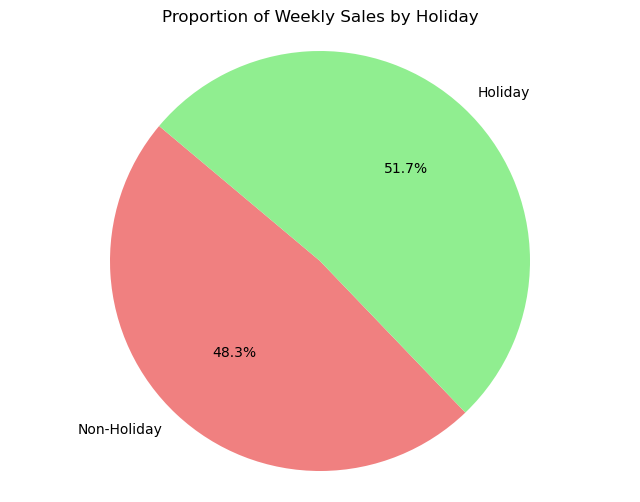

In [150]:
import matplotlib.pyplot as plt

# Grouping data based on holidays and calculating total weekly sales
sales_by_holiday = data.groupby('Holiday')['Weekly_Sales'].mean()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(sales_by_holiday, labels=['Non-Holiday', 'Holiday'], autopct='%1.1f%%', colors=['lightcoral', 'lightgreen'], startangle=140)
plt.title('Proportion of Weekly Sales by Holiday')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


# Linear Regression  (Model 4)

In [151]:
#Linear Regression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

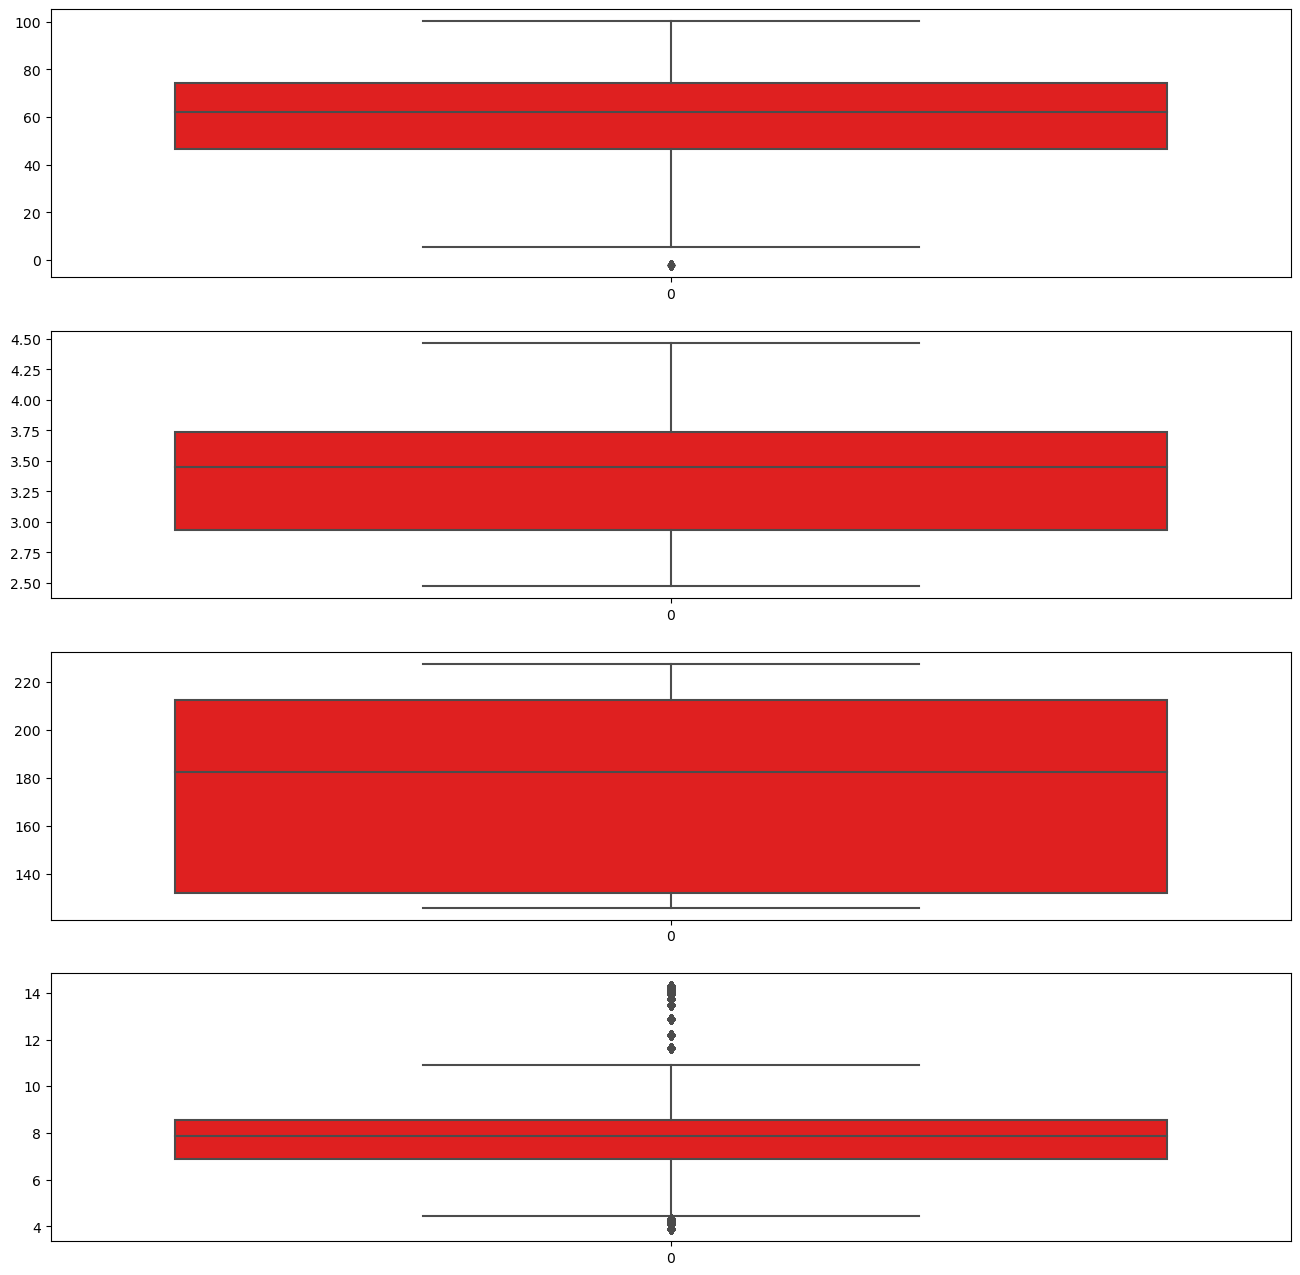

In [152]:
figure, axis = plt.subplots(4,figsize=(16,16))
X = data[['Temperature','Fuel_Price','CPI','Unemployment']]
for i,column in enumerate(X):
    sns.boxplot(data[column],ax=axis[i], color ='red')

In [153]:
#now that we have detected the outliers we are going to remove them. 
df_clean = data[(data['Unemployment']<10) & (data['Unemployment']>5) & (data['Temperature']>10)]
df_clean

,Store,Dept,Date,Weekly_Sales,Holiday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,week,year,month
0,1,1,2010-02-05,24924.50,0,42.31,2.572,211.096358,8.106,A,151315,5,2010,2
1,1,1,2010-02-12,46039.49,1,38.51,2.548,211.242170,8.106,A,151315,6,2010,2
2,1,1,2010-02-19,41595.55,0,39.93,2.514,211.289143,8.106,A,151315,7,2010,2
3,1,1,2010-02-26,19403.54,0,46.63,2.561,211.319643,8.106,A,151315,8,2010,2
4,1,1,2010-03-05,21827.90,0,46.50,2.625,211.350143,8.106,A,151315,9,2010,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,0,64.88,3.997,192.013558,8.684,B,118221,39,2012,9
421566,45,98,2012-10-05,628.10,0,64.89,3.985,192.170412,8.667,B,118221,40,2012,10
421567,45,98,2012-10-12,1061.02,0,54.47,4.000,192.327265,8.667,B,118221,41,2012,10
421568,45,98,2012-10-19,760.01,0,56.47,3.969,192.330854,8.667,B,118221,42,2012,10


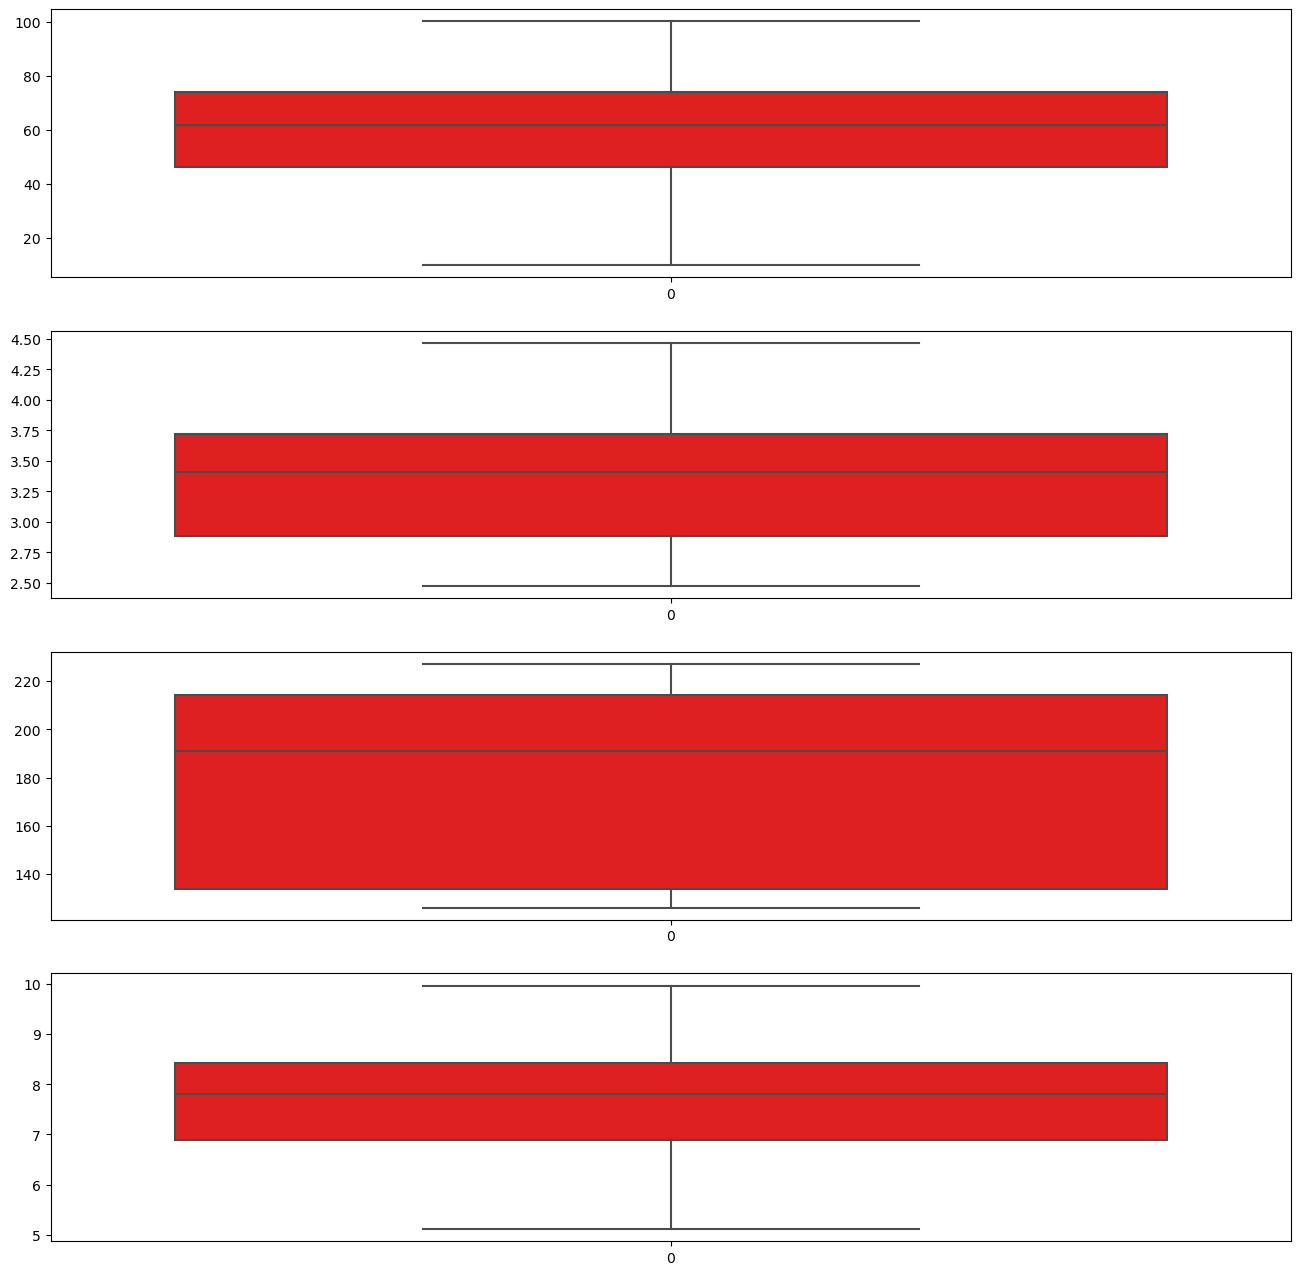

In [154]:
# to make sure we are going to repeat the first step once again.
fig, axis = plt.subplots(4,figsize=(16,16))
X = df_clean[['Temperature','Fuel_Price','CPI','Unemployment']]
for i,column in enumerate(X):
    sns.boxplot(df_clean[column], ax=axis[i], color='red')

In [155]:
X = df_clean[['Store','Fuel_Price','CPI','Unemployment']]
Y = df_clean['Weekly_Sales']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

In [156]:
reg = LinearRegression()
reg.fit(X_train, Y_train)
Y_pred = reg.predict(X_test)

In [157]:
print('Accuracy:',reg.score(X_train, Y_train)*100)
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

Accuracy: 0.8320073032810793
Mean Absolute Error: 15376.207291735596
Mean Squared Error: 535491709.767796
Root Mean Squared Error: 23140.6938048062


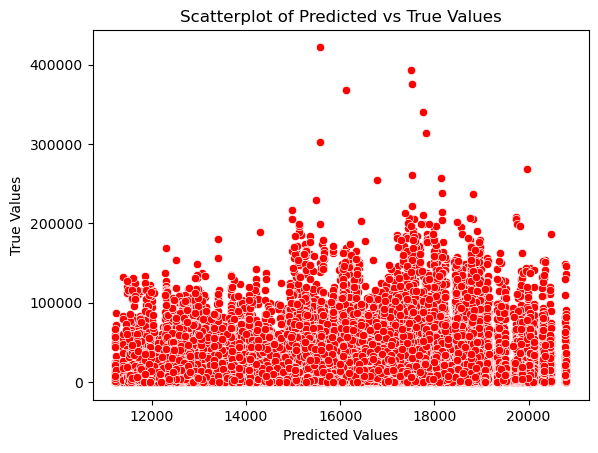

In [158]:

sns.scatterplot(x=Y_pred, y=Y_test, color='red') 
plt.xlabel('Predicted Values') 
plt.ylabel('True Values') 
plt.title('Scatterplot of Predicted vs True Values') 
plt.show()


In [159]:
import pandas as pd

# Assuming 'data' is your existing DataFrame containing various columns including 'Store', 'Dept', 'Holiday', and 'Weekly_Sales'

# Select the desired columns and create a new DataFrame
new_data = data[['Store', 'Dept', 'Holiday', 'Weekly_Sales']].copy()

# Display the first few rows of the new DataFrame
print(new_data.head())

   Store  Dept  Holiday  Weekly_Sales
0      1     1        0      24924.50
1      1     1        1      46039.49
2      1     1        0      41595.55
3      1     1        0      19403.54
4      1     1        0      21827.90


In [160]:
# Step 1: Select features for X and target for y
x = new_data[['Store', 'Dept', 'Holiday']]  # Features
y = new_data['Weekly_Sales']                # Target

# Step 2: Display the first few rows of X and y to check
print("Feature data (X):")
print(X.head())  # Displaying the first few rows of X

print("\nTarget data (y):")
print(y.head())  # Displaying the first few rows of y

# Step 3: Ensure consistency in data shapes
print("\nShape of X:", X.shape)  # Number of rows and features in X
print("Shape of y:", y.shape)  # Number of rows in y


Feature data (X):
   Store  Fuel_Price         CPI  Unemployment
0      1       2.572  211.096358         8.106
1      1       2.548  211.242170         8.106
2      1       2.514  211.289143         8.106
3      1       2.561  211.319643         8.106
4      1       2.625  211.350143         8.106

Target data (y):
0    24924.50
1    46039.49
2    41595.55
3    19403.54
4    21827.90
Name: Weekly_Sales, dtype: float64

Shape of X: (366786, 4)
Shape of y: (421570,)
